# Titanic data set
## Data collection

In [1]:
#import all the basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data file and displaying the top 5 rows of data file
df=pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#displaying the bottom 5 rows of the data file
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


we can see the top 5 and bottom 5 rows of our data set and we will get some idea about the attributes and the values inside each attribute

## EXPLORATORY DATA ANALYSIS

In [4]:
#displaying the column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#displaying the number of rows and columns present in our data set
df.shape

(891, 12)

From above two cell we can see the column names and we can see that we have 12 columns and 891 rows

In [6]:
#displaying the column names and the data type present in there respective column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

There are 2 columns with string type data and except that we columns are either float or int type. 

In [7]:
#checking wheather null value is present or not
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null value is present in Column Age,Cabin and Embarked

In [8]:
#Checking the value counts of each attribute
for attr in df.columns:
    print("\n",attr)
    print(df[attr].value_counts())


 PassengerId
891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

 Survived
0    549
1    342
Name: Survived, dtype: int64

 Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

 Name
Thayer, Mrs. John Borland (Marian Longstreth Morris)    1
Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)     1
Ward, Miss. Anna                                        1
Crosby, Capt. Edward Gifford                            1
Wiseman, Mr. Phillippe                                  1
                                                       ..
Moor, Mrs. (Beila)                                      1
Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)       1
Chaffee, Mr. Herbert Fuller                             1
Collyer, Miss. Marjorie "Lottie"                        1
Tornquist, Mr. William Henry                            1
Name: Name, Length: 891, dtype: int64

 Sex
male      577
female    314
Name

We can see all unique value in each column and there frequency.

In [9]:
#Checking for Max and Min value of each attribute
for column in df.columns:
    if df[column].dtype !='object':
        print(f"=======Column: {column}=======")
        print(f"Number of unique values: {df[column].nunique()}")
        print(f"Max: {df[column].max()}")
        print(f"Min: {df[column].min()}")

=======Column: PassengerId=======
Number of unique values: 891
Max: 891
Min: 1
=======Column: Survived=======
Number of unique values: 2
Max: 1
Min: 0
=======Column: Pclass=======
Number of unique values: 3
Max: 3
Min: 1
=======Column: Age=======
Number of unique values: 88
Max: 80.0
Min: 0.42
=======Column: SibSp=======
Number of unique values: 7
Max: 8
Min: 0
=======Column: Parch=======
Number of unique values: 7
Max: 6
Min: 0
=======Column: Fare=======
Number of unique values: 248
Max: 512.3292
Min: 0.0


We can see Max and Min of each column and we can see none of the column has negative value. 

In [10]:
#looking at the statistical information of our data set 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see all the statistical data of our data set.

## Univariate analysis

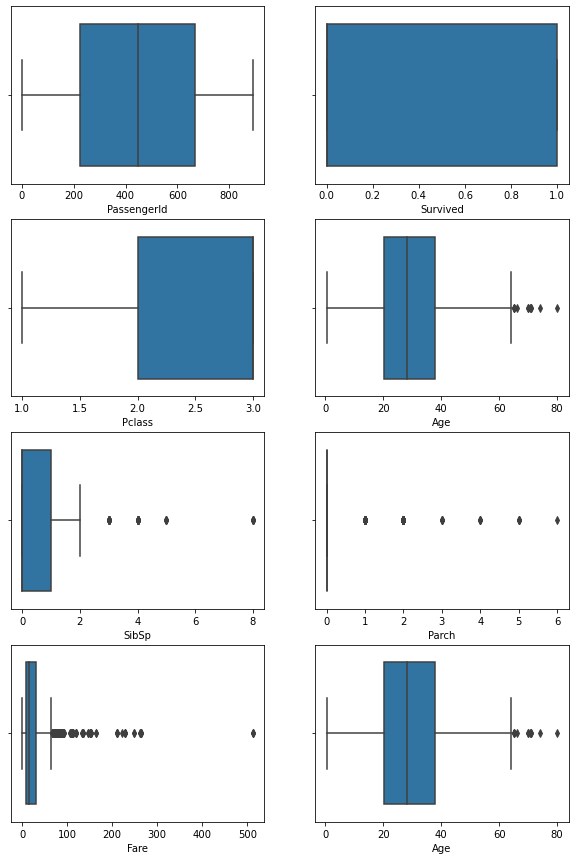

In [11]:
#ploting box plot for all numeric column
plt.figure(figsize=(10,15))
feature=['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare','Age']
enumerate(feature)
for i in enumerate(feature):
    plt.subplot(4,2,i[0]+1)
    sn.boxplot(i[1],data=df)

We have ploted box plot in order to see the outlier present in each column. And we can see outlier is present in some columns

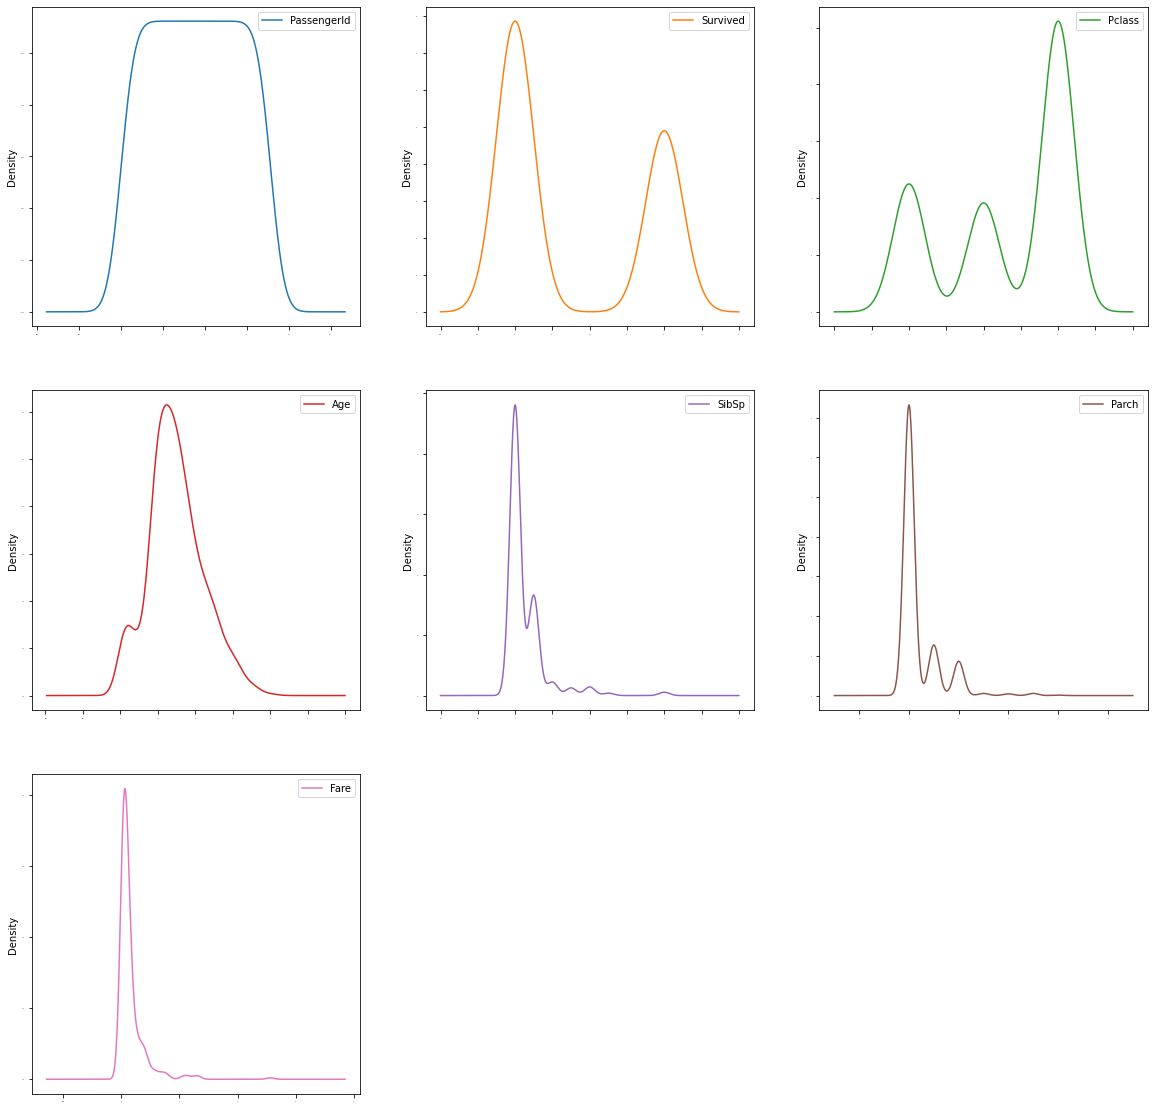

In [12]:
#ploting distribution curve for all the columns
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False,fontsize=1,figsize=(20,20))
plt.show()

We can see the distribution plot of each column and we can see that the some outlier is present.

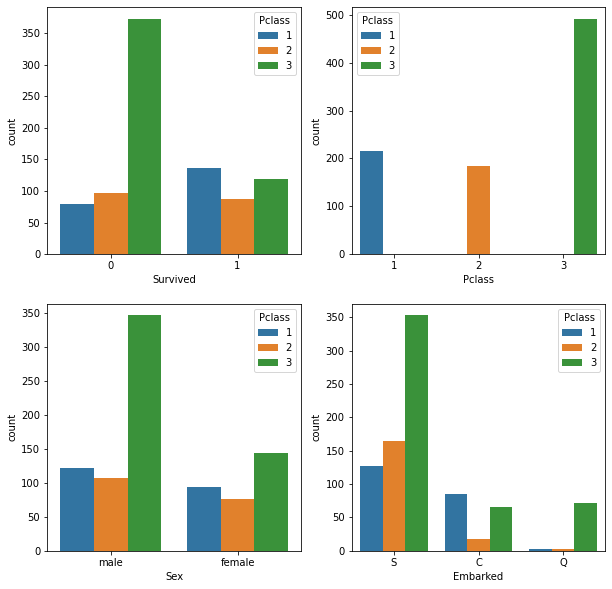

In [13]:
#ploating countplpot for all column with Pclass as to differentiate amoung Column attribute 
plt.figure(figsize=(10,10))
feature=['Survived','Pclass','Sex', 'Embarked']
enumerate(feature)
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sn.countplot(i[1],hue='Pclass',data=df)

From above table we can see the count of each column acooriding to there Pclass

<AxesSubplot:xlabel='Survived', ylabel='count'>

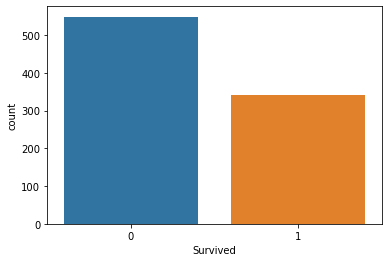

In [14]:
#ploating countplpot for Survived column
sn.countplot(x='Survived',data=df)

We can see death rate is more than sruvived rate

<AxesSubplot:xlabel='Pclass', ylabel='count'>

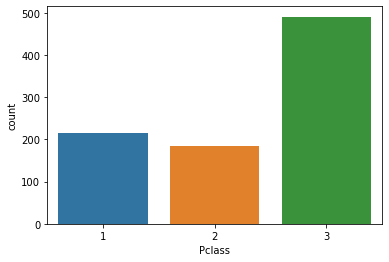

In [15]:
#ploating countplpot for Pclass column
sn.countplot(x='Pclass',data=df)

We can see that highest passenger are from Pclass 3 

<AxesSubplot:xlabel='Sex', ylabel='count'>

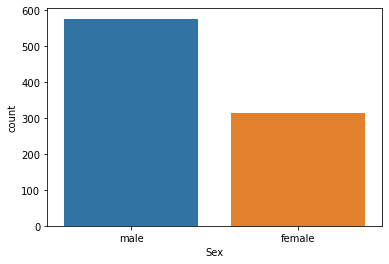

In [16]:
#ploating countplpot for Sex column
sn.countplot(x='Sex',data=df)

Male passenger are more than female

<AxesSubplot:xlabel='Embarked', ylabel='count'>

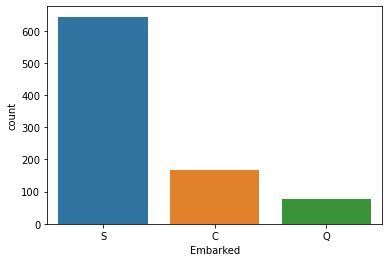

In [17]:
#ploating countplpot for Sex column
sn.countplot(x='Embarked',data=df)

People boarding from place C is more.

## Bivariate analysis

AxesSubplot(0.125,0.125;0.775x0.755)


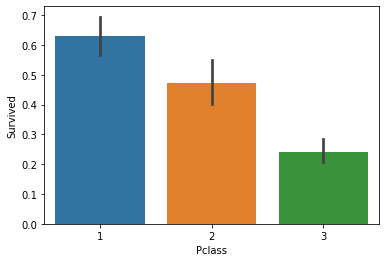

In [18]:
#ploting bar plot between 'Pclass'and 'Survived'
a=sn.barplot(x='Pclass',y='Survived',data=df)
print(a)

ploating Pclass with Survived column and we can see that the people from Pclass 1 has survived more compared to other two.

AxesSubplot(0.125,0.125;0.775x0.755)


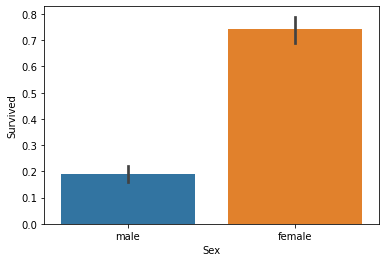

In [19]:
#ploting bar plot between 'Sex'and 'Survived'
a=sn.barplot(x='Sex',y='Survived',data=df)
print(a)

Survival rate of female is higher than that of male.

AxesSubplot(0.125,0.125;0.775x0.755)


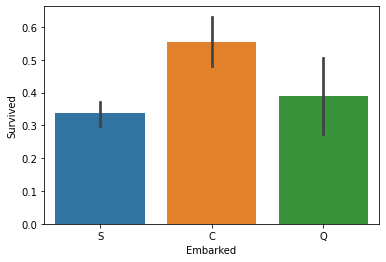

In [20]:
#ploting bar plot between 'Embarked'and 'Survived'
a=sn.barplot(x='Embarked',y='Survived',data=df)
print(a)

People who boarded from place c has survived the most

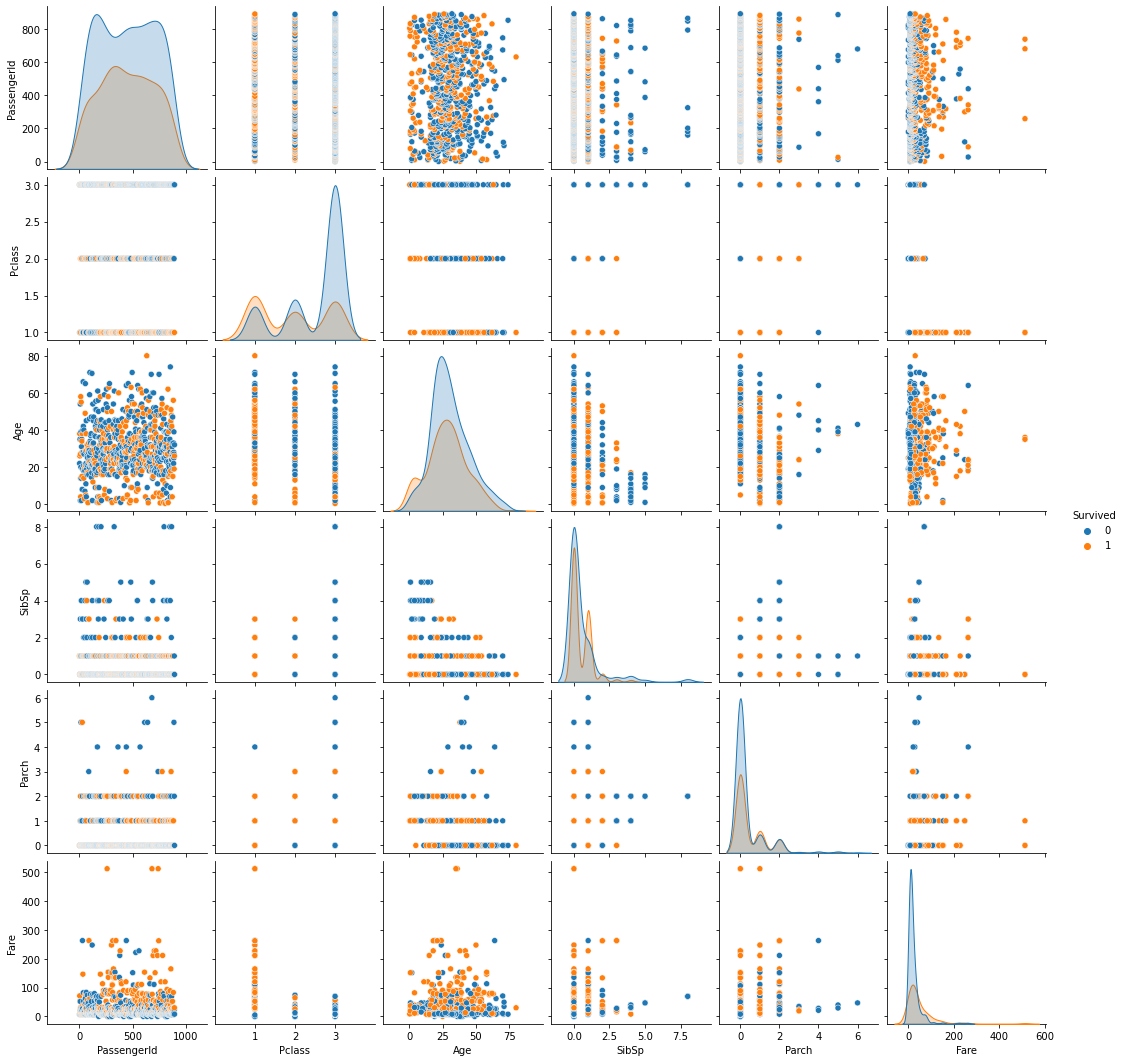

In [21]:
#ploting pair plot for our data set
sn.pairplot(df,hue='Survived')

We have ploted the pair plot between each attributes.

## Multi variate analysis

<AxesSubplot:>

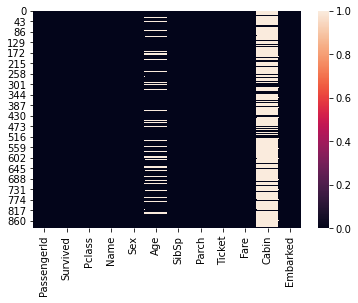

In [22]:
#ploting heat map to see wheather null value is present or not
sn.heatmap(df.isnull())

Representing null values in heatmap

In [23]:
#seeing correlation of each parameter with label column
df_Cor=df.corr()
df_Cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


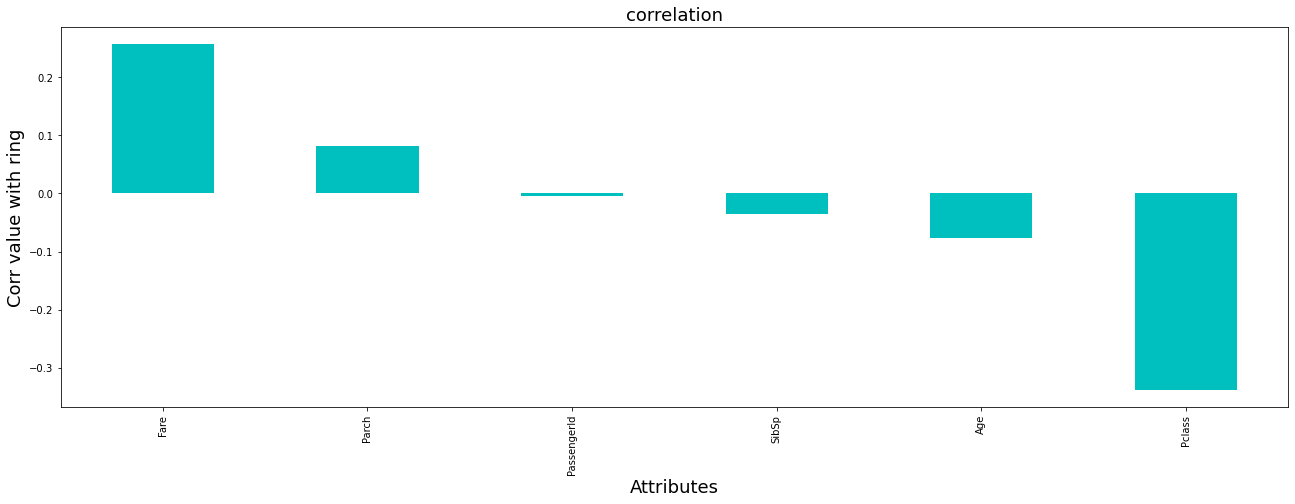

In [24]:
#plotting correlation value of each attribute with Survived column
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Attributes',fontsize=18)
plt.ylabel('Corr value with ring',fontsize=18)
plt.title('correlation',fontsize=18)
plt.show()

<AxesSubplot:>

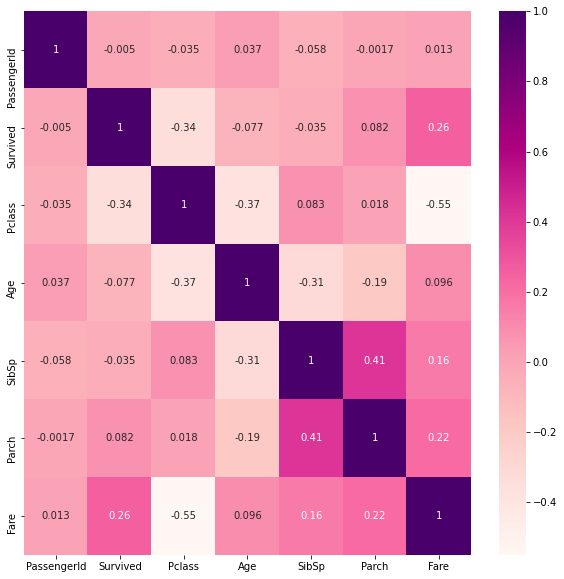

In [25]:
#ploting heat map for correlation matrix
plt.figure(figsize=(10,10))
sn.heatmap(df_Cor,annot=True,cmap='RdPu')

From above three cell we can see the correlation of each attribute with other attribute. And we can also see which has highest corelation and which has the lowest corelation with dependent variable.

# Data cleaning
## Droping the column

In [26]:
#droping the column
df.drop(['Cabin'],axis=1,inplace=True)

In [27]:
#droping the column
df.drop(['Name'],axis=1,inplace=True)

In [28]:
#droping the column
df.drop(['Ticket'],axis=1,inplace=True)

We have droped the column Cabin, Name, Ticket

## Treating missing value

In [29]:
#filling missing value by median
df['Age'].fillna(df['Age'].median(),inplace=True)

In [30]:
#droping the missing value
df = df.dropna(how='any',axis=0)

We have filled missing value in column Age by median and we have droped the missing value rows in column Embarked

# Feature Engineering
## Encoding

In [31]:
#converting sex column into float data type
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()

df['Sex']=enc.fit_transform(df['Sex'].values.reshape(-1,1))

In [32]:
df['Embarked']=enc.fit_transform(df['Embarked'].values.reshape(-1,1))

We have transfered sex and Embarked into numeric values

## Outlier removal

In [33]:
#Removing outlier by Z score method
df_NEW=df
from scipy.stats import zscore
z=np.abs(zscore(df))
df_NEW=df_NEW[(z<3).all(axis=1)]
print("Before removing outliers::",df.shape)
print("After removing outliers::",df_NEW.shape)
p=100-(len(df_NEW.index)/len(df.index)*100)
print(f'We are loosing {p} % of data.   ')

Before removing outliers:: (889, 9)
After removing outliers:: (818, 9)
We are loosing 7.986501687289092 % of data.   


In [34]:
#Removing outlier by IOR method
df_new2=df
from scipy import stats
IQR = stats.iqr(df) 
print('IQR =',IQR)
Q1 = df_new2.quantile(0.25)
Q3 = df_new2.quantile(0.75)
df_new2 = df_new2[~((df_new2 < (Q1 - 1.5 * IQR)) |(df_new2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print('df shape after IQR',df_new2.shape)
p=100-(len(df_new2.index)/len(df.index)*100)
print(f'We are loosing {p} % of data.   ')

IQR = 19.0
df shape after IQR (419, 9)
We are loosing 52.86839145106861 % of data.   


I have decided not to remove outlier as we loosing more than 7 % of data 

## Skewness removal

In [35]:
#checking the skewness
df.skew()

PassengerId    0.000000
Survived       0.484568
Pclass        -0.636998
Sex           -0.625625
Age            0.508010
SibSp          3.691058
Parch          2.745160
Fare           4.801440
Embarked      -1.261367
dtype: float64

In [36]:
#Removing skewness from Fare column
df['Fare']=np.log(df['Fare']+1)

Removing skewness fron continues value column Fare. And we are not removing skewness from 
Pclass, Sex, SibSp,Embarked as they are catogorical type

## Scaling the data

In [37]:
#Creating the dependent and independent variable
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [38]:
#scaling using standard scalar
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x=scalar.fit_transform(x)

Scaling the data so all dependent variable would be on same scale

## Treating class Imbalance

# Model building

In [39]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

## Selecting best random state

In [40]:
#selecting best random state
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is ',maxAccu,' on random state ',maxRS)

Best accuracy is  0.8061224489795918  on random state  81


In [42]:
#train, test, split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=81)

## Random Forest Classifier Model

In [43]:
#building model using RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
print('score:',RFC.score(x_train,y_train))
print('\n')
print("Accuracy score :",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

score: 1.0


Accuracy score : 0.8475336322869955


[[127  14]
 [ 20  62]]


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       141
           1       0.82      0.76      0.78        82

    accuracy                           0.85       223
   macro avg       0.84      0.83      0.83       223
weighted avg       0.85      0.85      0.85       223



In [44]:
#cross validation of randon forest classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8031993905922683


## AdaBoostClassifier Model

In [45]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
y_pred=ABC.predict(x_test)
train_pred=ABC.predict(x_train)
print('score:',RFC.score(x_train,y_train))
print('\n')
print("Accuracy score :",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

score: 1.0


Accuracy score : 0.8475336322869955


[[127  14]
 [ 20  62]]


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       141
           1       0.82      0.76      0.78        82

    accuracy                           0.85       223
   macro avg       0.84      0.83      0.83       223
weighted avg       0.85      0.85      0.85       223



In [46]:
#cross validation of randon forest classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.7287818193359995


## DecisionTreeClassifier Model

In [47]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
print('score:',RFC.score(x_train,y_train))
print('\n')
print("Accuracy score :",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

score: 1.0


Accuracy score : 0.7847533632286996


[[123  18]
 [ 30  52]]


              precision    recall  f1-score   support

           0       0.80      0.87      0.84       141
           1       0.74      0.63      0.68        82

    accuracy                           0.78       223
   macro avg       0.77      0.75      0.76       223
weighted avg       0.78      0.78      0.78       223



In [48]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7660953469180474


## KNeighborsClassifier Model

In [49]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('score:',RFC.score(x_train,y_train))
print('\n')
print("Accuracy score :",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

score: 1.0


Accuracy score : 0.7668161434977578


[[116  25]
 [ 27  55]]


              precision    recall  f1-score   support

           0       0.81      0.82      0.82       141
           1       0.69      0.67      0.68        82

    accuracy                           0.77       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223



In [51]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.79417888656129


I am selecting Random Forest Classifier Model and DecisionTreeClassifier Model as the difference between the Accuracy score and Cross validation score is less

## HYPER PARAMETER TUNING

In [52]:
#Hyper parameter tuning for Random Forest Classifier
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}
RFC1=RandomForestClassifier()
clf=GridSearchCV(RFC1,parameters)
clf.fit(x_test,y_test)
print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto'}


In [55]:
RFC1=RandomForestClassifier(criterion='entropy',max_features='auto')
RFC1.fit(x_train,y_train)
pred=RFC1.predict(x_test)
print('score:',RFC1.score(x_train,y_train))
print('\n')
print("Accuracy score :",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

score: 1.0


Accuracy score : 0.8430493273542601


[[128  13]
 [ 22  60]]


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       141
           1       0.82      0.73      0.77        82

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



In [56]:
print(cross_val_score(RFC1,x,y,cv=5).mean())

0.8065638291119152


In [58]:
#Hyper parameter tuning for Decision Tree Classifier
parameters={'criterion':['gini','entropy'],'max_depth':list(range(1,50))}
DTC1=DecisionTreeClassifier()
clf=GridSearchCV(DTC1,parameters)
clf.fit(x_test,y_test)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 1}


In [61]:
DTC1=DecisionTreeClassifier(criterion='gini',max_depth=1)
DTC1.fit(x_train,y_train)
pred=DTC1.predict(x_test)
print('score:',DTC1.score(x_train,y_train))
print('\n')
print("Accuracy score :",accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

score: 0.7747747747747747


Accuracy score : 0.820627802690583


[[125  16]
 [ 24  58]]


              precision    recall  f1-score   support

           0       0.84      0.89      0.86       141
           1       0.78      0.71      0.74        82

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



In [62]:
print(cross_val_score(DTC1,x,y,cv=5).mean())

0.7862756300387227


After Hyper parameter the accuracy has increased and comparing RandomForestClassifier and DecisionTreeClassifier I have selected Random Forest Classifier  

With accuracy score of 84%

## roc_auc_score

In [65]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


y_pred_prob=RFC1.predict_proba(x_test)[:,1]
frp,tpr,thresholds=roc_curve(y_test,y_pred_prob)

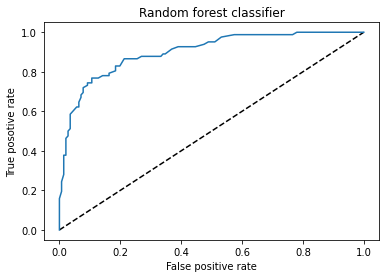

In [66]:
plt.plot([0,1],[0,1],'k--')
plt.plot(frp,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True posotive rate')
plt.title('Random forest classifier')
plt.show()

In [68]:
auc_score=roc_auc_score(y_test,RFC1.predict(x_test))
print(auc_score)

0.8197543677564435


# Saving model

In [69]:
#saving the model
import joblib
joblib.dump(RFC1,'FinalModel.pkl')

['FinalModel.pkl']